In [154]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [156]:
df = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [157]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [158]:
df.shape

(4340, 8)

In [159]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [160]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [161]:
df.duplicated().value_counts()

False    3577
True      763
dtype: int64

In [162]:
df.drop_duplicates(inplace=True)

In [163]:
df.describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [164]:
df.describe(include=object)

,name,fuel,seller_type,transmission,owner
count,3577,3577,3577,3577,3577
unique,1491,5,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,54,1800,2832,3265,2218


#plot kde plots

<Axes: xlabel='selling_price', ylabel='Count'>

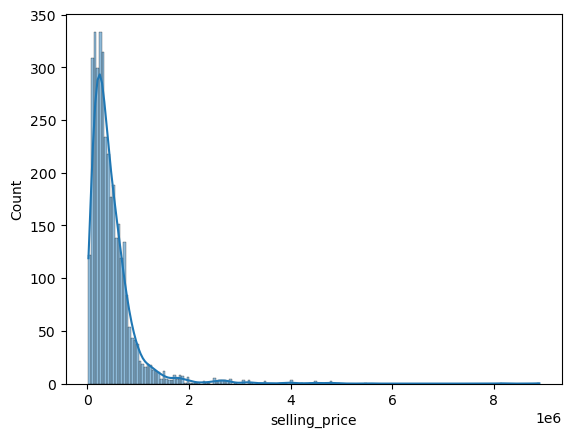

In [165]:
sns.histplot(x='selling_price',data=df,kde=True)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x500 with 0 Axes>

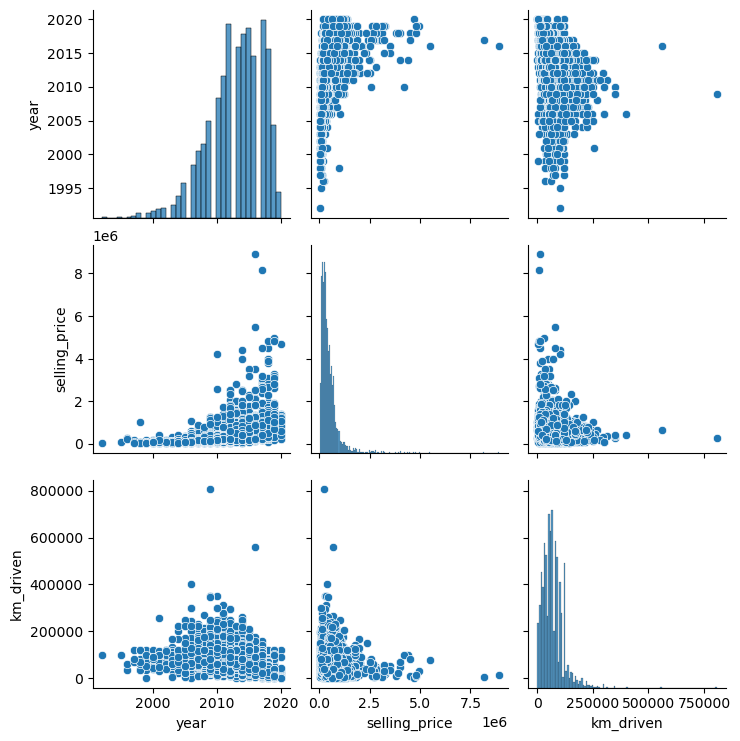

In [166]:
plt.figure(figsize=(5,5))
sns.pairplot(df)

## ploting for output featuer i.e "selling_price"

<Figure size 800x500 with 0 Axes>

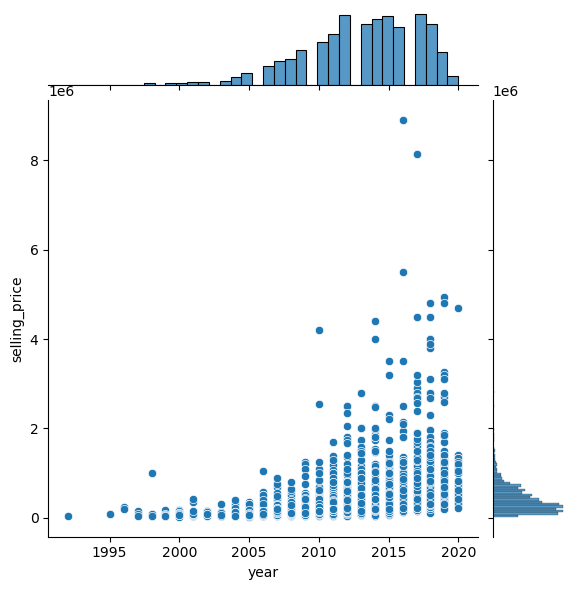

In [167]:
plt.figure(figsize=(8,5))
sns.jointplot(x='year',y='selling_price',data=df)

<Figure size 800x500 with 0 Axes>

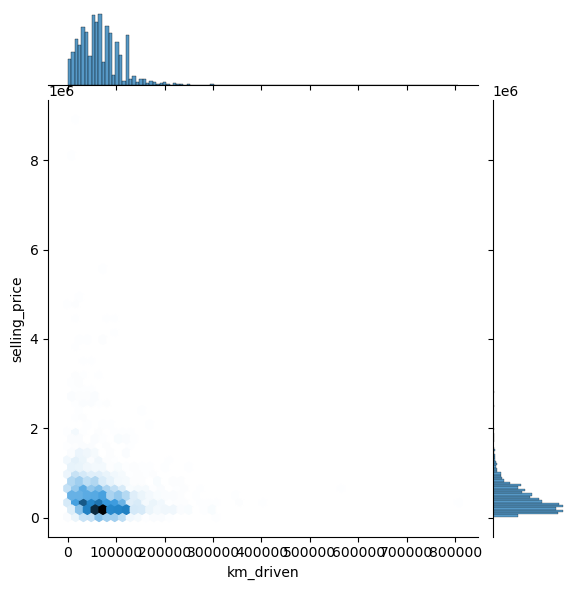

In [168]:
plt.figure(figsize=(8,5))
sns.jointplot(x='km_driven',y='selling_price',data=df,kind='hex')

### For Categorical Features in df

#### Fuel

/tmp/ipykernel_32/1114652186.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x='selling_price',hue='fuel',data=df,fill=True)


<Axes: xlabel='selling_price', ylabel='Density'>

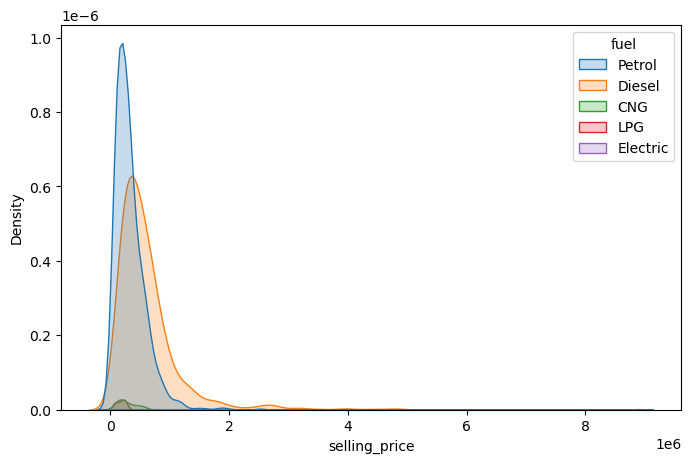

In [169]:
plt.figure(figsize=(8,5))
sns.kdeplot(x='selling_price',hue='fuel',data=df,fill=True)

<Axes: xlabel='selling_price', ylabel='fuel'>

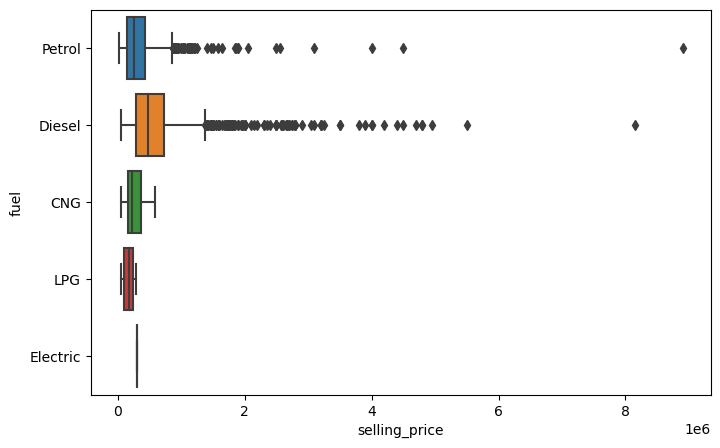

In [170]:
plt.figure(figsize=(8,5))
sns.boxplot(x='selling_price',y='fuel',data=df)

In [171]:
df.groupby('fuel')['selling_price'].describe()

,count,mean,std,min,25%,50%,75%,max
fuel,,,,,,,,
CNG,37.0,273162.081081,153123.672421,45000.0,160000.0,229999.0,365000.00,595000.0
Diesel,1800.0,614001.075000,591835.722619,45000.0,290000.0,475000.0,725000.00,8150000.0
Electric,1.0,310000.000000,NaN,310000.0,310000.0,310000.0,310000.00,310000.0
LPG,22.0,171818.136364,75032.423583,50000.0,105000.0,180000.0,237499.75,290000.0
Petrol,1717.0,335344.340128,361827.105801,20000.0,145000.0,260000.0,430000.00,8900000.0


#### seller_type

<Axes: xlabel='selling_price', ylabel='Density'>

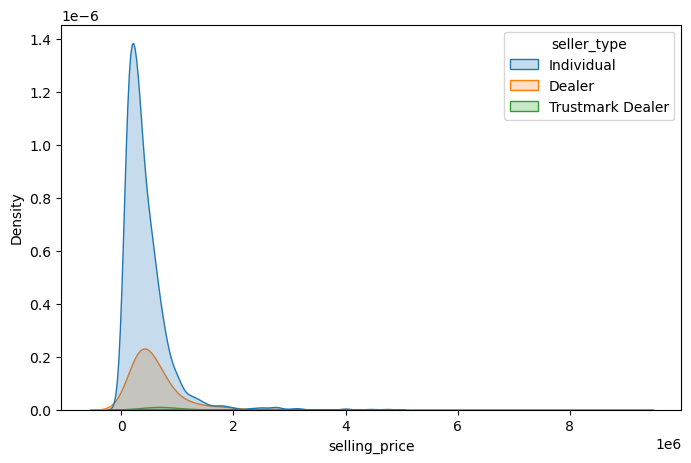

In [172]:
plt.figure(figsize=(8,5))
sns.kdeplot(x='selling_price',hue='seller_type',data=df,fill=True)

<Axes: xlabel='selling_price', ylabel='seller_type'>

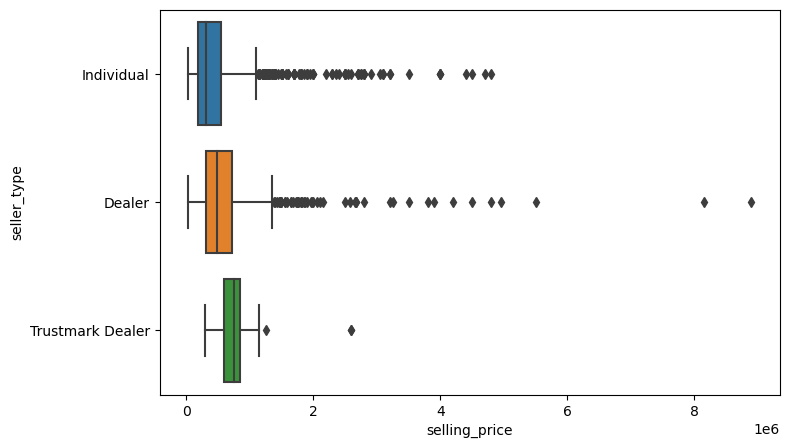

In [173]:
plt.figure(figsize=(8,5))
sns.boxplot(x='selling_price',y='seller_type',data=df)

In [174]:
df.groupby('seller_type')['selling_price'].describe()

,count,mean,std,min,25%,50%,75%,max
seller_type,,,,,,,,
Dealer,712.0,652699.390449,728405.464147,22000.0,305000.0,484999.0,724250.0,8900000.0
Individual,2832.0,424904.024364,423731.090989,20000.0,175000.0,303500.0,550000.0,4800000.0
Trustmark Dealer,33.0,822272.727273,514420.321377,295000.0,585000.0,750000.0,850000.0,2600000.0


### Transmission

<Axes: xlabel='selling_price', ylabel='Density'>

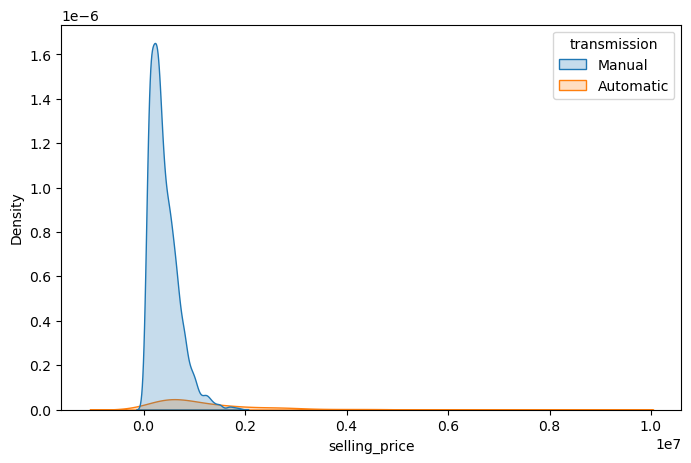

In [175]:
plt.figure(figsize=(8,5))
sns.kdeplot(x='selling_price',hue='transmission',data=df,fill=True)

<Axes: xlabel='selling_price', ylabel='transmission'>

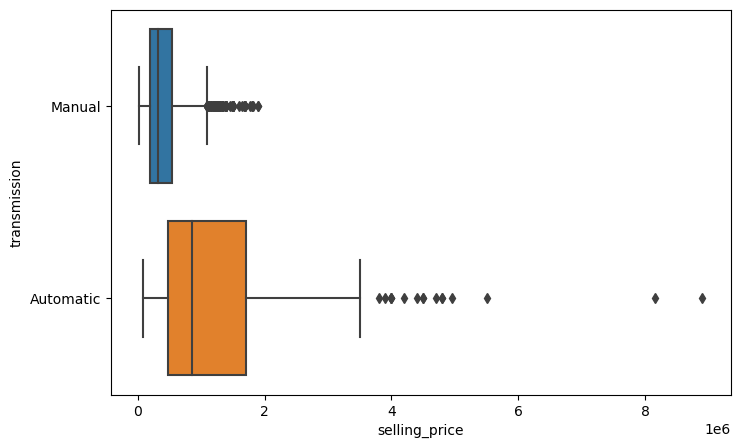

In [176]:
plt.figure(figsize=(8,5))
sns.boxplot(x='selling_price',y='transmission',data=df)

In [177]:
df.groupby('transmission')['selling_price'].describe()

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
Automatic,312.0,1.274955e+06,1.202846e+06,79000.0,474000.0,855000.0,1706250.0,8900000.0
Manual,3265.0,3.973657e+05,2.812973e+05,20000.0,190000.0,325000.0,550000.0,1900000.0


### Owner


<Axes: xlabel='selling_price', ylabel='Density'>

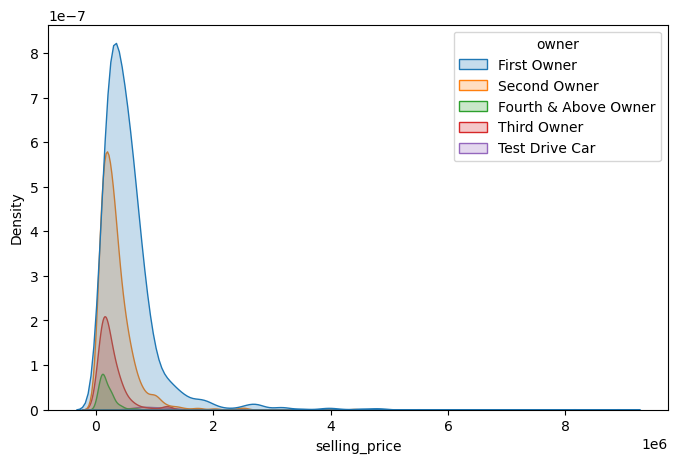

In [178]:
plt.figure(figsize=(8,5))
sns.kdeplot(x='selling_price',hue='owner',data=df,fill=True)

<Axes: xlabel='selling_price', ylabel='owner'>

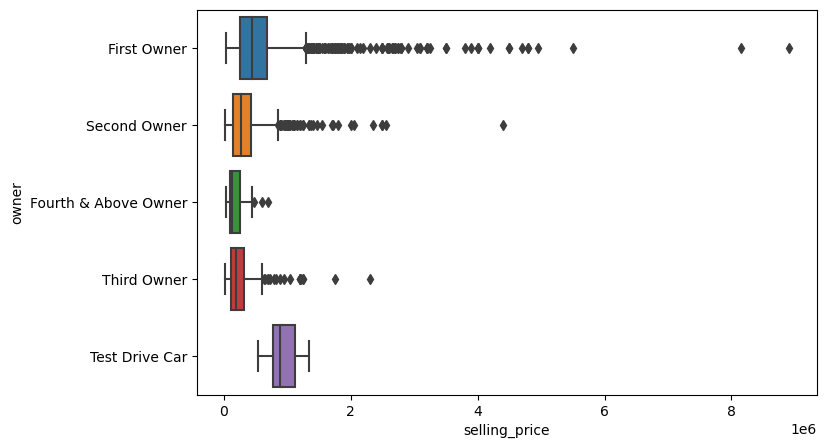

In [179]:
plt.figure(figsize=(8,5))
sns.boxplot(x='selling_price',y='owner',data=df)

In [180]:
df.groupby('owner')['selling_price'].describe()

,count,mean,std,min,25%,50%,75%,max
owner,,,,,,,,
First Owner,2218.0,565385.447250,579416.315756,40000.0,260750.0,450000.0,675000.0,8900000.0
Fourth & Above Owner,75.0,181213.293333,128106.824298,40000.0,100000.0,138000.0,250000.0,700000.0
Second Owner,978.0,341954.140082,323819.986420,20000.0,150000.0,267000.0,430000.0,4400000.0
Test Drive Car,17.0,954293.941176,250372.495392,541000.0,784000.0,894999.0,1119000.0,1350000.0
Third Owner,289.0,266142.207612,264813.735993,22000.0,120000.0,190000.0,320000.0,2300000.0


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 251.5+ KB


In [182]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from category_encoders import TargetEncoder
from sklearn import metrics

### Training - Testing

In [183]:
# creating and assigning output feature and input feature to a seperate variable
x = df.drop(['selling_price','name'],axis=1)
y = df['selling_price']

# spliting of data for training and testing phase
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

encode = TargetEncoder()
encoded_x_train = encode.fit_transform(x_train,y_train)
encoded_x_test = encode.transform(x_test)

scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(encoded_x_train)
scaled_x_test = scaler.transform(encoded_x_test)

param_grid = {
    'criterion':['squared_error','absolute_error','friedman_mse'],
    'splitter':['best','random'],
    'max_depth':[4,5,9]
}

det_reg = DecisionTreeRegressor()
grid_det = GridSearchCV(estimator=det_reg,param_grid=param_grid,cv=6)

grid_det = grid_det.fit(scaled_x_train,y_train)
grid_det

GridSearchCV(cv=6, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse'],
                         'max_depth': [4, 5, 9],
                         'splitter': ['best', 'random']})

In [184]:
gdt = grid_det.best_estimator_
sellingprice_predict = gdt.predict(scaled_x_test)

In [185]:
print(f'Best_params : {grid_det.best_params_}')
from sklearn.metrics import r2_score
r2_score(y_test,sellingprice_predict)

Best_params : {'criterion': 'absolute_error', 'max_depth': 4, 'splitter': 'best'}


0.5164464096159869

In [186]:
from sklearn import metrics

print('MAE:',metrics.mean_absolute_error(y_test,sellingprice_predict))
print('MSE:',metrics.mean_squared_error(y_test,sellingprice_predict))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,sellingprice_predict)))

MAE: 179567.73184357543
MSE: 124704994502.84637
RMSE: 423.7543295868202
